# Stock Fundamental Analysis

This notebook demonstrates the usage of the modular stock analysis architecture. The architecture separates concerns into distinct modules:
1. Data retrieval
2. Financial analysis
3. Technical analysis
4. Visualization
5. AI-powered analysis
6. Report generation and export

In [15]:
# Add the project root directory to the Python path to allow importing from src
import sys
import os

# Get the current directory
current_dir = os.path.dirname(os.path.abspath('__file__'))

# Go up one level to reach the project root if needed
project_root = os.path.dirname(current_dir) if current_dir.endswith('src') else current_dir

# Add the project root to Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to Python path")
else:
    print("Project root already in Python path")

# Show the current Python path for debugging
print(f"Current working directory: {os.getcwd()}")
print(f"Python path: {sys.path}")

Project root already in Python path
Current working directory: /Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/src
Python path: ['/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python310.zip', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10', '/Users/camiloramirezf/.pyenv/versions/3.10.4/lib/python3.10/lib-dynload', '', '/Users/camiloramirezf/Documents/agent_repos/stock_fundamentals/.venv/lib/python3.10/site-packages']


In [16]:
# Import required libraries and custom modules
import os
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Image, HTML
from datetime import datetime
import matplotlib.pyplot as plt

# Import our custom modules
from src.data import StockData
from src.financial_analysis import FinancialAnalysis
from src.technical_analysis import TechnicalAnalysis
from visualization import StockVisualization
from src.ai_analysis import AIAnalysis
from src.reporting import ReportGenerator

# To silence future warnings
import warnings
warnings.filterwarnings('ignore')

## Input Stock Symbol

Enter the stock symbol you want to analyze.

In [17]:
# Input stock symbol
stock_symbol = "NU" # "FSLR"  # You can replace with input() to take user input
print(f"Analyzing {stock_symbol}...")

Analyzing NU...


## 1. Data Collection

Let's gather historical price data, company information, and financial statements using our `StockData` class.

In [18]:
# Initialize StockData
stock_data = StockData(stock_symbol)

# Fetch stock data
if stock_data.fetch_stock_data(years=2):
    company_info = stock_data.get_company_info()
    print(f"Company: {company_info['company_name']}")
    print(f"Sector: {company_info['sector']}")
    print(f"Industry: {company_info['industry']}")
    print(f"Current Price: ${company_info['current_price']}")
    
    # Fetch financial statements
    stock_data.fetch_financial_statements()

Company: Nu Holdings Ltd.
Sector: Financial Services
Industry: Banks - Regional
Current Price: $12.15


In [5]:
# Calculate price trends
price_trends = stock_data.calculate_price_trends()
print("\nPrice Trends:")
print(price_trends)


Price Trends:
3-month price change: 24.97% (Change in closing price over the last 3 months)
6-month price change: -16.82% (Change in closing price over the last 6 months)
12-month price change: -40.55% (Change in closing price over the last 12 months)
All-time high: $300.71 on 2024-06-12 (Highest closing price in available data)
All-time low: $120.38 on 2025-04-08 (Lowest closing price in available data)


## 2. Financial Ratio Analysis

Calculate and visualize key financial ratios that are important for fundamental analysis.

In [6]:
# Initialize Financial Analysis
fin_analysis = FinancialAnalysis(stock_data)

# Calculate financial ratios
financial_ratios = fin_analysis.calculate_financial_ratios()

# Format and display ratios
ratios_df = fin_analysis.format_financial_ratios(financial_ratios)
print("\nKey Financial Ratios:")
display(ratios_df)


Key Financial Ratios:


,Ratio,Formatted Value
0,P/E Ratio,14.12
1,Forward P/E,7.97
2,P/B Ratio,2.18
3,P/S Ratio,4.19
4,EV/EBITDA,9.60
5,PEG Ratio,-1.24
6,Gross Margin,43.61%
7,Operating Margin,26.20%
8,Net Profit Margin,29.72%
9,ROE,16.77%


In [7]:
# Get financial highlights
financial_highlights = fin_analysis.get_financial_highlights()
print("\nRecent Annual Financial Highlights (in millions USD):")
print(financial_highlights)


Recent Annual Financial Highlights (in millions USD):
Revenue: $4206.29M
Net Income: $1292.04M
EBITDA: $1868.71M
Total Assets: $12124.36M
Total Liabilities: $4146784000.00M
Equity: $-4146771875.64M


## 3. Historical Price and Volume Analysis

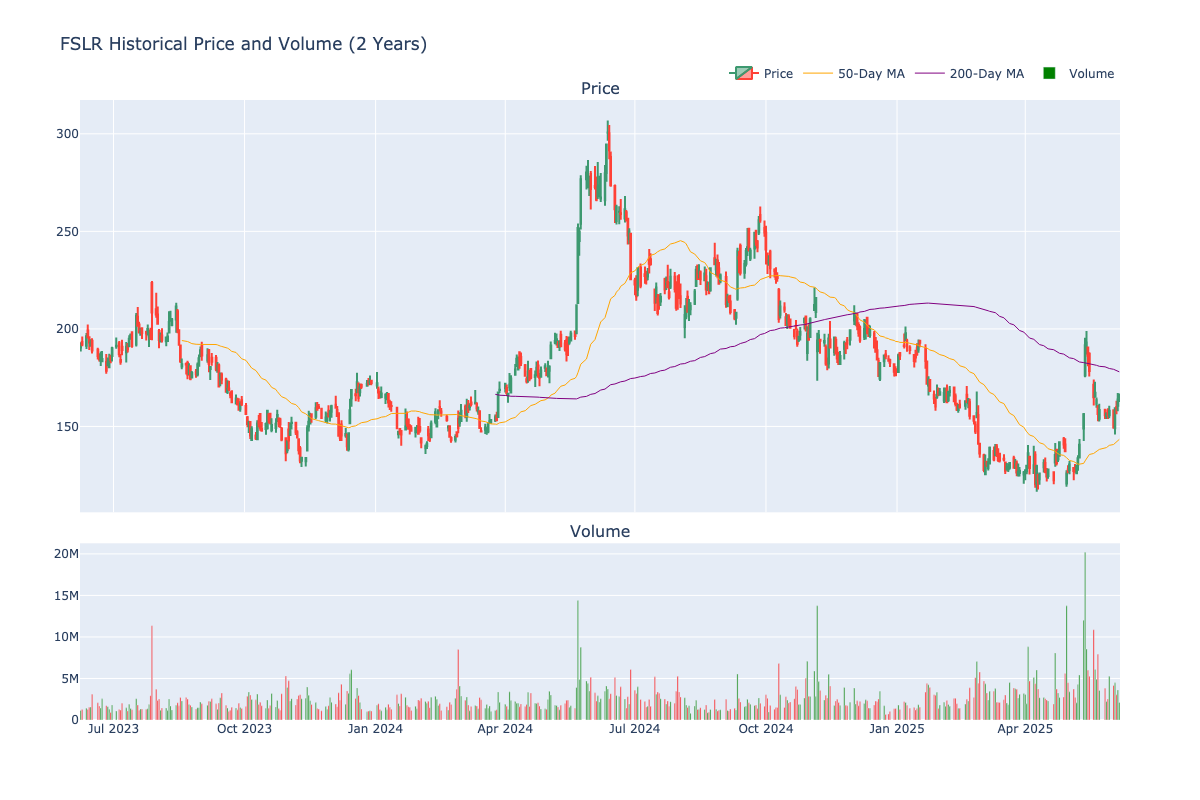

In [8]:
# Initialize Visualization
viz = StockVisualization(stock_data)

# Create price and volume chart
price_volume_chart = viz.create_price_volume_chart()

# Display the chart
viz.safe_plot_display(price_volume_chart, static=True)
# TODO: Create static display image method

## 4. Technical Analysis Indicators

In [9]:
# Initialize Technical Analysis
tech_analysis = TechnicalAnalysis(stock_data)

# Calculate technical indicators
tech_data = tech_analysis.calculate_technical_indicators()

# Get recent indicator values for later use in AI analysis
recent_indicators = tech_analysis.get_recent_indicators(tech_data)
print("Recent Technical Indicators:")
for indicator, value in recent_indicators.items():
    print(f"{indicator}: {value:.2f}")

Recent Technical Indicators:
Close: 166.35
RSI: 39.89
MACD: 4.47
MACD_Signal: 5.28
MACD_Histogram: -0.81
ATR: 8.44
BB_Upper: 191.16
BB_Middle: 164.08
BB_Lower: 136.99


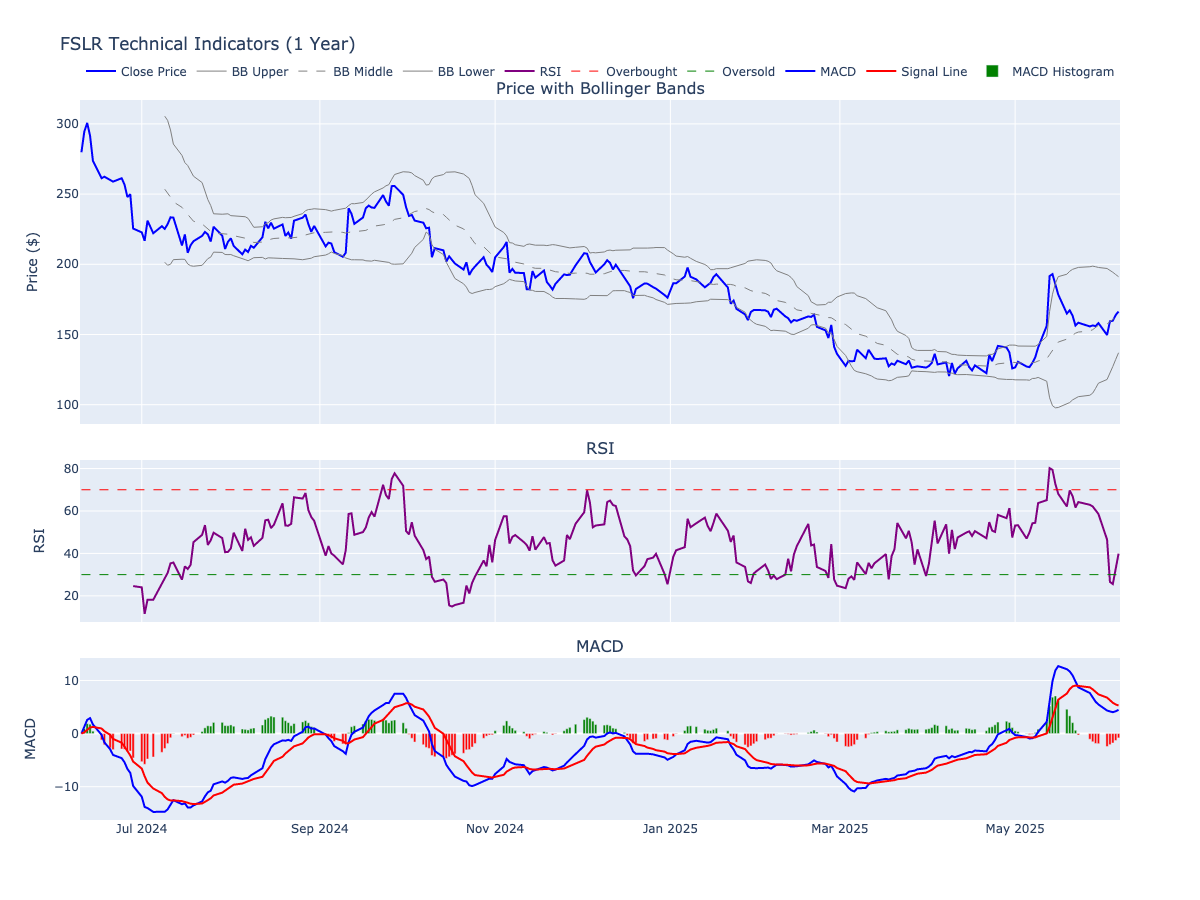

In [10]:
# Create technical analysis chart
tech_chart = viz.create_technical_chart(tech_data)

# Display the chart
viz.safe_plot_display(tech_chart)
# TODO: Create static display image method

## 5. News and Geopolitical Analysis

Let's fetch and analyze recent news about the company using OpenAI. Ensure you have an OpenAI API key stored in your environment variables or in a .env file.

In [11]:
# Initialize AI Analysis module
ai = AIAnalysis()  # Will use OPENAI_API_KEY from environment variables

OpenAI client initialized successfully.


In [12]:
# Get news analysis
company_name = company_info['company_name']
news_analysis = ai.get_news_analysis(company_name, stock_symbol, price_trends)
print(f"\nNews and Geopolitical Analysis for {company_name} ({stock_symbol}):\n")

# Display formatted news analysis
ReportGenerator.display_markdown(news_analysis)


News and Geopolitical Analysis for First Solar, Inc. (FSLR):



**Comprehensive Analysis of First Solar, Inc. (FSLR)**

As of June 7, 2025, First Solar, Inc. (FSLR) has experienced notable fluctuations in its stock performance:

- **3-Month Price Change:** +24.97%
- **6-Month Price Change:** -16.82%
- **12-Month Price Change:** -40.55%

The stock reached its all-time high of $300.71 on June 12, 2024, and its all-time low of $120.38 on April 8, 2025.

**1. Recent Earnings Reports and Financial Performance**

- **Q1 2025 Performance:** First Solar reported a net income of $209.5 million for the quarter ending March 31, 2025, marking an 11.4% decrease from the previous year. Net sales rose by 6.4% to $844.6 million. The average selling price declined to 30.5 cents per watt, down 2.6% year-over-year. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

- **Annual Forecast Revision:** The company adjusted its 2025 net sales forecast to between $4.5 billion and $5.5 billion, down from the previous estimate of $5.3 billion to $5.8 billion. Earnings per share are now projected to range from $12.50 to $17.50, lower than the earlier forecast of $17.00 to $20.00. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

**2. Stock Price Development**

The stock's recent performance reflects market reactions to various factors:

- **Q1 2025 Earnings Announcement:** Following the earnings report on April 29, 2025, shares fell 11% in after-hours trading, indicating investor concern over the revised forecasts and declining average selling prices. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

**3. Major Business Developments**

- **New Manufacturing Facilities:** In September 2024, First Solar inaugurated a $1.1 billion facility in Alabama, adding 3.5 gigawatts of capacity. The company is also constructing a $1.1 billion plant in Louisiana, expected to come online in 2026, which will further enhance its domestic manufacturing capabilities. ([en.wikipedia.org](https://en.wikipedia.org/wiki/First_Solar?utm_source=openai))

- **Technological Advancements:** First Solar is transitioning to "CuRe" technology, with full validation and integration into production lines expected by 2026. Additionally, the company is developing a perovskite production line to accelerate next-generation thin-film photovoltaic technology. ([stockinvest.us](https://stockinvest.us/earnings-report/FSLR?utm_source=openai))

**4. Future Innovations, Partnerships, or Acquisitions**

- **Acquisition of Evolar:** In May 2023, First Solar acquired Evolar, a European company specializing in perovskite technology, for $38 million. This acquisition aims to enhance First Solar's technological capabilities in the solar industry. ([en.wikipedia.org](https://en.wikipedia.org/wiki/First_Solar?utm_source=openai))

- **Partnership with Vitro Architectural Glass:** First Solar expanded its agreement with Vitro Architectural Glass, which is investing in upgrading existing facilities in the United States to produce glass for First Solar's panels. The expanded capacity is expected to commence production in the first quarter of 2026. ([finance.yahoo.com](https://finance.yahoo.com/news/first-solar-inc-nasdaq-fslr-170455897.html?utm_source=openai))

**5. Leadership Changes or Organizational Restructuring**

- **CEO Appointment:** Mark Widmar has been serving as the CEO of First Solar since July 1, 2016, succeeding James Hughes. ([en.wikipedia.org](https://en.wikipedia.org/wiki/First_Solar?utm_source=openai))

**6. Regulatory Developments Affecting the Company**

- **U.S. Tariffs on Solar Imports:** The U.S. government imposed new tariffs on solar modules imported from Southeast Asia, aiming to protect domestic manufacturers. While this benefits First Solar's domestic production, it has also led to market volatility and challenges in the residential sector. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

**7. Macroeconomic Factors Influencing the Company and Its Industry**

- **Interest Rates and Residential Demand:** High interest rates have dampened residential solar installations, affecting First Solar's sales in the residential sector. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

- **Policy Uncertainties:** Recent policy changes and uncertainties in the U.S. have impacted customer procurement and overall market clarity, posing challenges for First Solar. ([stockinvest.us](https://stockinvest.us/earnings-report/FSLR?utm_source=openai))

**8. Geopolitical Events That Might Impact Operations or Supply Chains**

- **U.S.-China Trade Relations:** The ongoing trade tensions between the U.S. and China have led to tariffs on solar imports, affecting First Solar's supply chain and pricing strategies. ([reuters.com](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai))

**9. Competitive Landscape Changes**

- **Market Position:** First Solar remains a leading player in the U.S. solar industry, benefiting from domestic manufacturing and technological advancements. However, it faces competition from both domestic and international manufacturers, especially in the wake of global trade tensions and policy changes.

**Conclusion**

First Solar, Inc. has demonstrated resilience through strategic investments in manufacturing capacity and technological innovation. However, it faces challenges from regulatory changes, macroeconomic factors, and geopolitical tensions that may impact its short-term performance. The company's focus on domestic production and advanced technologies positions it well for long-term growth in the evolving solar energy market.


## First Solar Lowers Annual Sales and Profit Forecast Amid Tariff Challenges:
- [First Solar lowers annual sales and profit forecast on near-term tariff troubles](https://www.reuters.com/business/energy/first-solar-lowers-annual-sales-profit-forecast-near-term-tariff-troubles-2025-04-29/?utm_source=openai) 

## 6. Comprehensive AI-Generated Analysis Report

Now, let's generate a comprehensive report that analyzes all the data we've collected.

In [13]:
# Generate comprehensive report
print("\nGenerating comprehensive investment analysis report...\n")
comprehensive_report = ai.generate_comprehensive_report(
    stock_symbol,
    stock_data.info,
    financial_ratios,
    recent_indicators,
    news_analysis,
    price_trends=price_trends
)


Generating comprehensive investment analysis report...



In [14]:
# Display the report as formatted markdown
ReportGenerator.display_markdown(comprehensive_report)

# Investment Analysis Report for First Solar, Inc. (FSLR)

## 1. Executive Summary
First Solar, Inc. (FSLR) is a leading player in the solar technology sector, specializing in the manufacturing of solar modules and providing utility-scale PV power plants. As of June 7, 2025, the company faces significant challenges, including a declining stock price over the past year and a recent downward revision of its earnings and sales forecasts. Despite these hurdles, First Solar is investing heavily in manufacturing capacity and technological advancements, positioning itself for potential long-term growth in the solar energy market.

## 2. Fundamental Analysis
### Financial Health
- **Market Capitalization:** $17.84 billion
- **P/E Ratio:** 14.12, indicating the stock is relatively undervalued compared to the market average.
- **Forward P/E Ratio:** 7.97, suggesting strong future earnings potential.
- **Gross Margin:** 43.61%, indicating effective cost management.
- **Operating Margin:** 26.20%, showcasing operational efficiency.
- **Net Profit Margin:** 29.72%, reflecting strong profitability.
- **ROE:** 16.77%, indicating effective use of equity.
- **Current Ratio:** 1.93, suggesting good short-term liquidity.
- **Debt-to-Equity Ratio:** 7.7, indicating high leverage, which could pose risks in a rising interest rate environment.

### Valuation
- **P/B Ratio:** 2.18, indicating the stock is trading at a premium to its book value.
- **P/S Ratio:** 4.19, suggesting the stock is relatively expensive based on sales.
- **PEG Ratio:** -1.24, indicating negative earnings growth, which is a concern for investors.

### Growth Prospects
- **Revenue Growth (YoY):** 6.4%, indicating positive sales momentum.
- **Earnings Growth (YoY):** -11.4%, reflecting recent challenges in profitability.

## 3. Technical Analysis
- **Current Price:** $166.35
- **52-Week Range:** $116.56 - $306.77
- **3-Month Price Change:** +24.97%
- **6-Month Price Change:** -16.82%
- **12-Month Price Change:** -40.55%
- **RSI:** 39.89, indicating the stock is nearing oversold territory.
- **MACD:** -0.81, suggesting bearish momentum.
- **Bollinger Bands:** The stock is currently trading near the lower band, indicating potential for a rebound.

## 4. News Impact Analysis
Recent news has significantly impacted First Solar's stock performance:
- The company lowered its annual sales and profit forecasts due to tariff challenges and declining average selling prices, leading to an 11% drop in stock price post-earnings announcement.
- Strategic investments in new manufacturing facilities and technological advancements are positive developments, but the immediate market reaction has been negative due to concerns over short-term profitability.

## 5. Risk Assessment
- **High Leverage:** The debt-to-equity ratio of 7.7 indicates high financial risk, especially in a rising interest rate environment.
- **Market Volatility:** Recent fluctuations in stock price reflect investor uncertainty and market volatility.
- **Regulatory Risks:** New tariffs and policy changes could adversely affect sales and profitability.
- **Technological Risks:** The transition to new technologies may face execution challenges.

## 6. Investment Outlook
### Strengths
- Strong market position in the solar industry.
- High gross and net profit margins.
- Ongoing investments in manufacturing capacity and technology.

### Weaknesses
- Recent earnings and sales forecast revisions indicate potential short-term challenges.
- High leverage may pose risks in a volatile market.

### Opportunities
- Growing demand for renewable energy solutions.
- Potential for technological advancements to drive future growth.

### Threats
- Regulatory changes and tariffs impacting profitability.
- Competitive pressures from domestic and international manufacturers.

## 7. Recommendation
**Recommendation: Hold**

### Rationale:
- **Short-Term Concerns:** The recent downward revisions in earnings and sales forecasts, coupled with high leverage, suggest caution for short-term investors.
- **Long-Term Potential:** The company’s strategic investments in manufacturing and technology position it well for future growth in the expanding solar market.
- **Market Volatility:** Given the current price fluctuations and market sentiment, a hold recommendation allows investors to reassess the situation as new developments unfold.

Investors should monitor First Solar's performance closely, especially regarding its ability to navigate regulatory challenges and execute its growth strategy effectively.

In [22]:
ticker = "NU"

for i in range(10):

    stock_data = StockData(ticker)
            
    # Fetch stock data
    stock_data.fetch_stock_data()

    # Fetch financial statements
    stock_data.fetch_financial_statements()

    # Get basic company info
    company_info = stock_data.get_company_info()

    stock_data.info